In [1]:
%pylab inline
import pickle
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm_notebook as tqdm

Populating the interactive namespace from numpy and matplotlib


In [2]:
figsize(8, 8)

In [3]:
id2word = pickle.load(
    open("../../../datasets/skip_id2word.pickle", "rb")
)

word2id = pickle.load(
    open("../../../datasets/skip_word2id.pickle", "rb")
)

data = np.memmap("../../../datasets/skip_np.npy", mode="r+",
                    dtype=np.float, shape=(929605,100))

In [4]:
text = pickle.load(
    open("corpus_text.pickle", "rb")
)

len(text), "".join([i+" " for i in text[2]])

(37,
 'após guerra trabalhou laboratório nacional física reino unido onde criou primeiros projetos computador programa armazenado ace posteriormente turing interessou química escreveu artigo sobre base química morfogênese previu reações químicas oscilantes reação belousov zhabotinsky observadas primeira vez década ')

In [5]:
sentences = []

for paragraph in text:
    sentences.append([word2id[word] for word in paragraph if word in id2word])

In [6]:
similarity_matrix = np.zeros(shape=(len(text),
                                    len(text)), dtype=np.float)

In [7]:
for i, x in enumerate(sentences):
    for j, y in enumerate(sentences):
        if i != j :
            similarity_matrix[i, j] = np.sum(
                                          cosine_similarity(data[x],data[y])
                                      ).item(0)

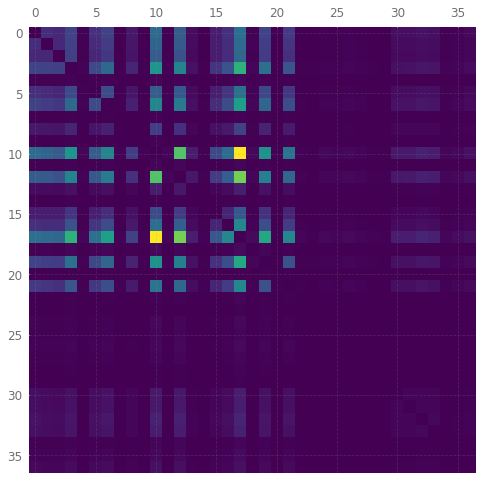

In [14]:
matshow(similarity_matrix, cmap=cm.viridis)
savefig("../images/similarity_matrix-classificacao-1.png", transparent=True)

In [9]:
G = nx.from_numpy_array(similarity_matrix)

In [10]:
scores = nx.pagerank(G)

In [11]:
original = pickle.load(
    open("original_text-Alan_Turing.pickle", "rb")
)

In [12]:
word_rank = sorted([(scores[i],i, s) for i, s in enumerate(original)], key=lambda x:x[0], reverse=True)

In [13]:
qnt_lines = 5

top = sorted(word_rank[:qnt_lines], key=lambda x:x[0])

for i in range(qnt_lines):
    print(f"-- parágrafo do resumo: {i} | parágrafo original: {top[i][1]}")
    print(top[i][2], end="\n\n")

-- parágrafo do resumo: 0 | parágrafo original: 19
Por muitos anos, foram feitas campanhas que envolveram ativistas da tecnologia da informação, do meio político e do público LGBT. Em 11 de setembro de 2009, 55 anos após sua morte, o primeiro-ministro do Reino Unido, Gordon Brown, seguindo um pedido feito através de uma petição direcionada ao governo britânico, pediu desculpas formais em nome do governo pelo tratamento preconceituoso e desumano dado a Turing, que o levou ao suicídio. Em 24 de dezembro de 2013, passou a ter efeito a Real Prerrogativa do Perdão, concedida a Turing pela Rainha Elizabeth II, a pedido do ministro da justiça do Reino Unido, Chirs Grayling, depois que uma petição criada em 2012 obteve mais de 37.000 assinaturas solicitando o devido perdão.

-- parágrafo do resumo: 1 | parágrafo original: 3
A homossexualidade de Turing resultou em um processo criminal em 1952, pois atos homossexuais eram ilegais no Reino Unido na época, e ele aceitou o tratamento com hormônios